# Supermarket Sales Prediction

### Import all dependencies

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [83]:
#ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Data Collection and Preprocessing

In [84]:
# loading train dataset
mart_data =  pd.read_csv("data/Train.csv")

In [85]:
# show dataset
mart_data.head(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [86]:
# dataset information
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [87]:
# checking missing values
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handle missing values

In [88]:
# mean value of Item_weight
mart_data["Item_Weight"].mean()

12.857645184135976

In [89]:
# replace missing values with mean value
mart_data["Item_Weight"].fillna(mart_data["Item_Weight"].mean(), inplace = True)

In [90]:
# mode of outlet size column
mart_data["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [91]:
# find modes in each type of market
mode_of_Outlet_size = mart_data.pivot_table(values = "Outlet_Size",
                                            columns = "Outlet_Type",
                                            aggfunc = (lambda x: x.mode()[0]))
mode_of_Outlet_size

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [92]:
type(mode_of_Outlet_size)

pandas.core.frame.DataFrame

In [93]:
# missing values
miss_vals = mart_data["Outlet_Size"].isnull()
miss_vals

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [94]:
# replace missing values
mart_data.loc[miss_vals, "Outlet_Size"] = mart_data.loc[miss_vals, "Outlet_Type"].apply(lambda x: mode_of_Outlet_size[x])

In [95]:
# checking missing values again
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis and Visualization

In [96]:
# statistical measures
mart_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [97]:
# setting plot type
sns.set()

<Figure size 600x600 with 0 Axes>

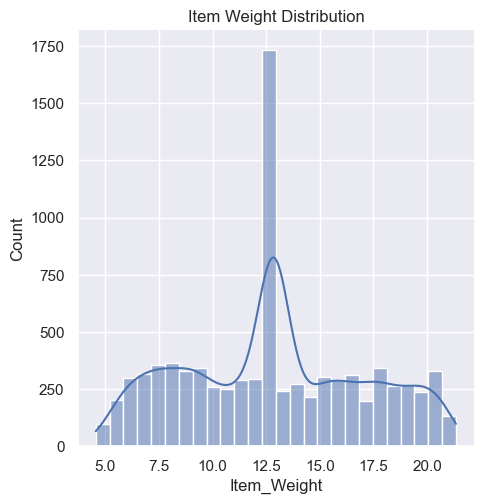

In [98]:
# Item weight distribution
plt.figure(figsize = (6,6))
sns.displot(mart_data["Item_Weight"], kde = True)
plt.title("Item Weight Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

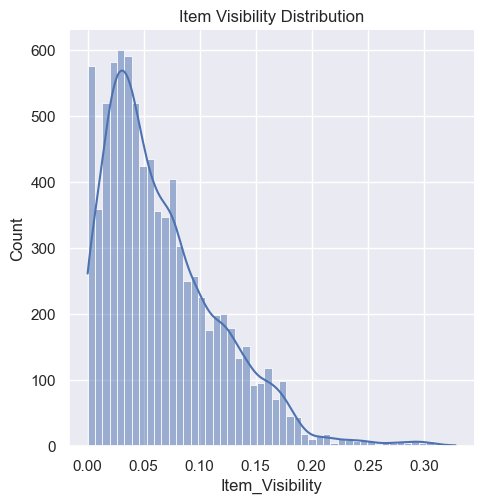

In [99]:
# Item visibility distribution
plt.figure(figsize = (6,6))
sns.displot(mart_data["Item_Visibility"], kde = True)
plt.title("Item Visibility Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

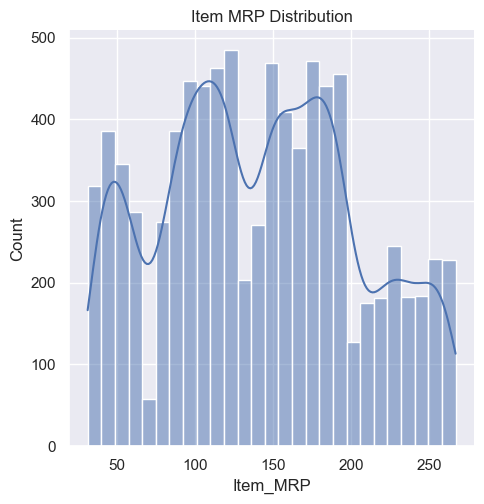

In [100]:
# Item MRP distribution
plt.figure(figsize = (6,6))
sns.displot(mart_data["Item_MRP"], kde = True)
plt.title("Item MRP Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

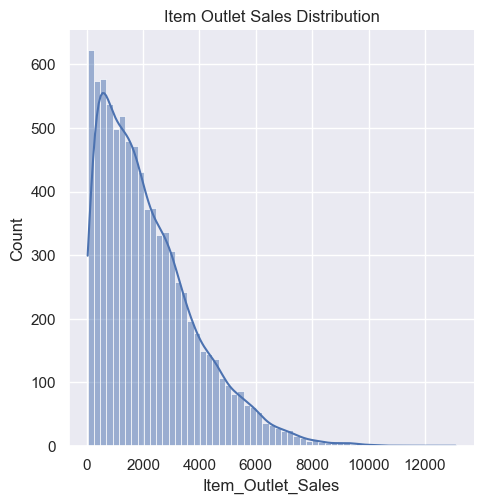

In [101]:
# Item Outlet sales distribution
plt.figure(figsize = (6,6))
sns.displot(mart_data["Item_Outlet_Sales"], kde = True)
plt.title("Item Outlet Sales Distribution")
plt.show()

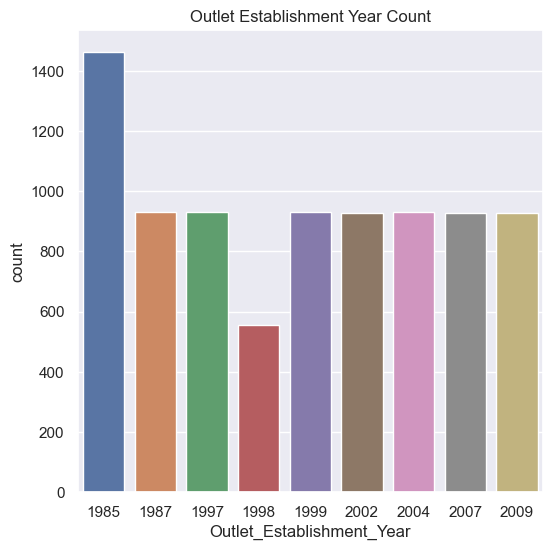

In [102]:
# Outlet Establishment Year 
plt.figure(figsize = (6,6))
sns.countplot(x = "Outlet_Establishment_Year", data = mart_data)
plt.title("Outlet Establishment Year Count")
plt.show()

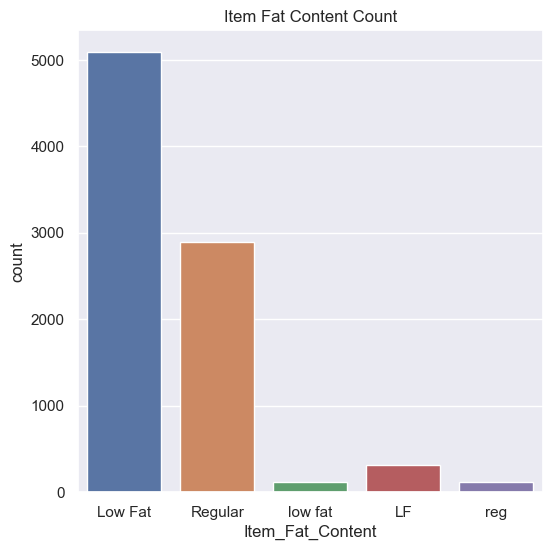

In [103]:
# Item Fat Content  
plt.figure(figsize = (6,6))
sns.countplot(x = "Item_Fat_Content", data = mart_data)
plt.title("Item Fat Content Count")
plt.show()

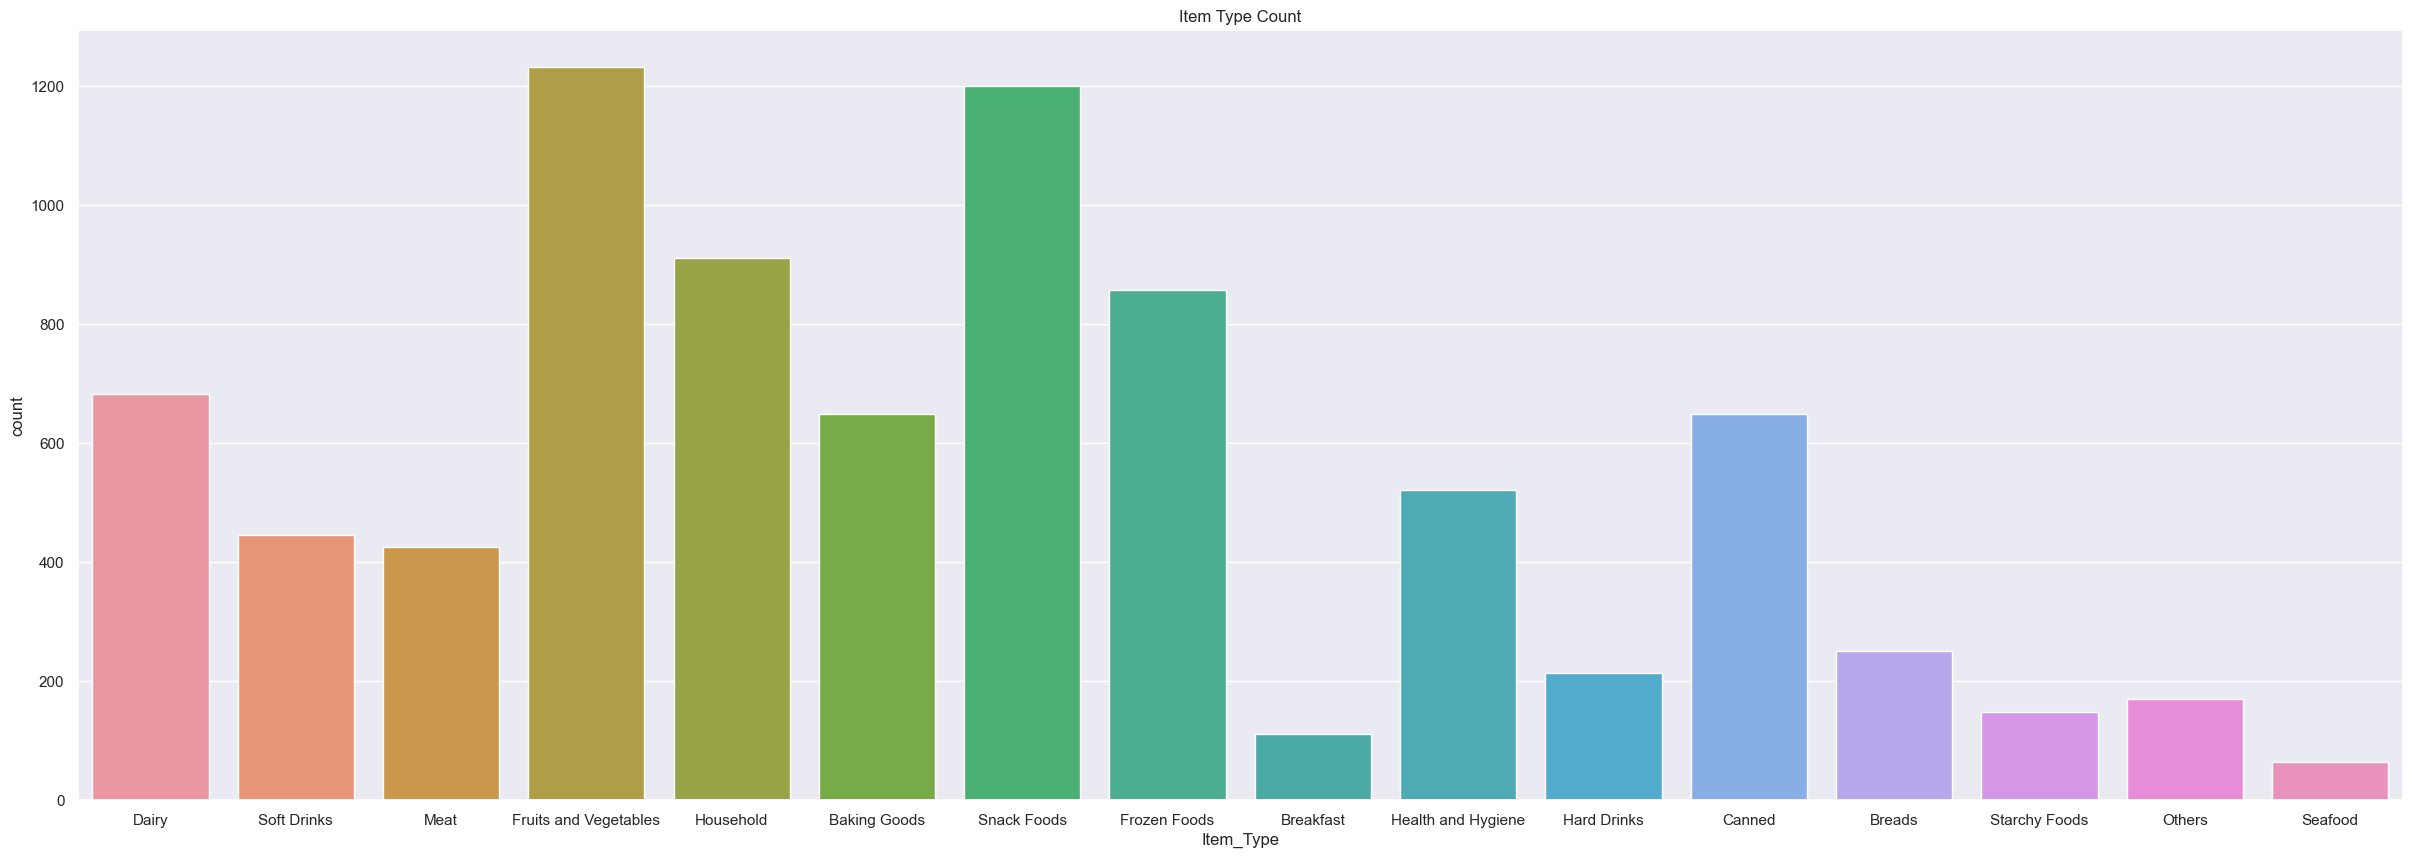

In [104]:
# Item Type 
plt.figure(figsize = (30,10))
sns.countplot(x = "Item_Type", data = mart_data)
plt.title("Item Type Count")
plt.show()

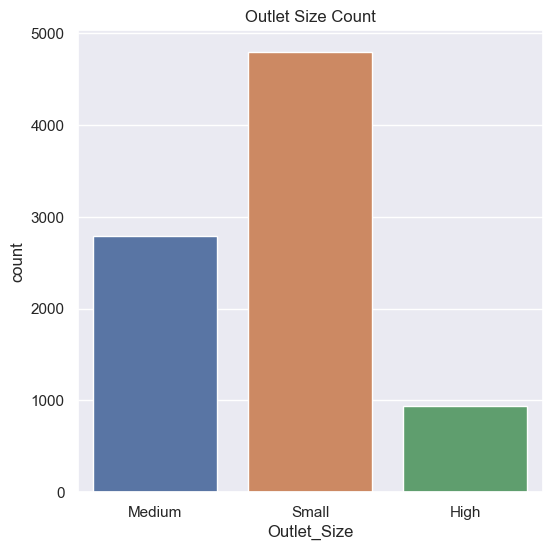

In [105]:
# Outlet size
plt.figure(figsize = (6,6))
sns.countplot(x = "Outlet_Size", data = mart_data)
plt.title("Outlet Size Count")
plt.show()

In [106]:
# there is some ambiguity in Item fat content column
mart_data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [107]:
# combining sismilar labels
mart_data.replace({"Item_Fat_Content": {"low fat":"Low Fat", 
                                        "LF": "Low Fat", 
                                        "reg": "Regular"}}, inplace = True)

In [108]:
# chek if labels are fixed
mart_data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Label Encoding

In [109]:
encoder = LabelEncoder()

In [110]:
# encoding all categorical column 
cols = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

for col in cols:
    try:
        mart_data[col] = encoder.fit_transform(mart_data[col])
    except:
        print(col)

In [111]:
# check all data encoded in numerical values
mart_data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            2   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

### Split Features and Target

In [112]:
X = mart_data.drop(columns = "Item_Outlet_Sales", axis = 1)
Y = mart_data["Item_Outlet_Sales"]

In [113]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

### Split Train and Test data

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [115]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (8523, 11)
Train data:  (6818, 11)
Test data:  (1705, 11)


In [116]:
print(X_train)
print(Y_train)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
7173              627    11.800000                 1         0.057422   
3315              996    12.857645                 0         0.000000   
5932             1127     7.725000                 0         0.047783   
7872              439    10.500000                 0         0.052555   
5946              993    12.857645                 1         0.235859   
...               ...          ...               ...              ...   
1099              600     7.235000                 0         0.099963   
2514              680    19.350000                 0         0.118103   
6637              969    18.700000                 1         0.092096   
2575               55     8.880000                 0         0.086957   
7336             1262     6.630000                 1         0.104445   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
7173         10  149.9366                  8    

### Model Training

In [117]:
model = XGBRegressor()

In [118]:
#training the XGB regressor
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Model Evalution

In [119]:
# training data prediction
training_data_prediction = model.predict(X_train)

# R squared value
r2_train = metrics.r2_score(training_data_prediction, Y_train)

print("R Squred Value of train data: ", r2_train)

R Squred Value of train data:  0.813599695558012


In [120]:
# test data prediction
test_data_prediction = model.predict(X_test)

# R squared value
r2_test = metrics.r2_score(test_data_prediction, Y_test)

print("R Squred Value of test data: ", r2_test)

R Squred Value of test data:  0.21249740750834345
